## Sales Forecasting Using Time Series and Clustering Analysis

In this analysis, we aim to perform sales segmentation based on Sales Location and Sales Medium using clustering techniques like K-Means and DBSCAN. These insights will allow us to categorize sales data into meaningful clusters, which can then be leveraged for sales forecasting, strategic decision-making, and optimization of resources. Additionally, we'll use these clusters to improve business performance by identifying patterns in revenue and sales counts.

* Data Preprocessing: Cleaning and preparing the dataset for analysis.
* Sales Location Segmentation: Using K-Means clustering to group sales locations.
* Sales Medium Segmentation: Applying K-Means and DBSCAN for sales medium classification.
* Data Visualization: Visualizing clusters to understand segmentation.
* Business Insights: Extracting actionable business insights based on clustering results.



### 1. Importing Libraries and Loading Data

We start by importing the necessary libraries and loading the sales dataset. The dataset includes information on sales count, total revenue, and other relevant metrics like sales medium and location.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans # For clustering sales data.
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
# Ensure the correct file path is used
df = pd.read_excel("C:/Users/muge/Dropbox/GMU/Portfolio/Nestle/NESTLE SALES DATASET.xlsx")

# Display basic info about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18115 entries, 0 to 18114
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sales ID        18115 non-null  object        
 1   Date            18115 non-null  datetime64[ns]
 2   Product Name    18115 non-null  object        
 3   Total Revenue   18115 non-null  float64       
 4   Sales Location  18115 non-null  object        
 5   Sales Medium    18115 non-null  object        
 6   Sales count     18115 non-null  int64         
 7   Product Count   18115 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.1+ MB
None


### 2. Sales Location Segmentation Using K-Means

We will first group the sales data by Sales Location, aggregating the total sales count and revenue for each location. Then, we apply K-Means clustering to categorize the sales locations into different segments based on sales performance.

Business Insight:
Understanding the sales performance in different locations helps in identifying regions with high potential or regions that may need more attention to boost sales.

* GroupBy: Aggregates sales count and revenue by location.
* K-Means Clustering: Divides locations into 3 clusters, which can be adjusted depending on the analysis.
* Visualization: Displays the segmentation of sales locations.

C:\Users\muge\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


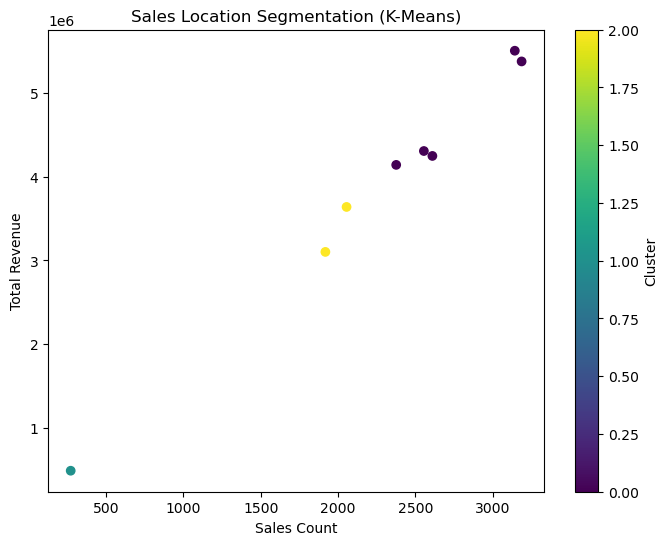

                 Sales Location  Cluster
0  Australian Capital Territory        2
1               New South Wales        0
2            Northern Territory        0
3                    Queensland        0
4               South Australia        0
5                      Tasmania        0
6                      Victoria        2
7             Western Australia        1


In [2]:
# Group by Sales Location and calculate total sales and revenue
df_location_segmentation = df.groupby('Sales Location').agg({
    'Sales count': 'sum',
    'Total Revenue': 'sum'
}).reset_index()

# Prepare features for clustering
X = df_location_segmentation[['Sales count', 'Total Revenue']]

# Use K-Means to cluster the sales locations
kmeans = KMeans(n_clusters=3, random_state=42)  # we can adjust n_clusters as needed
df_location_segmentation['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_location_segmentation['Sales count'], df_location_segmentation['Total Revenue'], c=df_location_segmentation['Cluster'], cmap='viridis')
plt.title('Sales Location Segmentation (K-Means)')
plt.xlabel('Sales Count')
plt.ylabel('Total Revenue')
plt.colorbar(label='Cluster')
plt.show()

# Show the cluster assignments
print(df_location_segmentation[['Sales Location', 'Cluster']])

This chart is a scatter plot visualizing the results of K-Means clustering applied to sales location data, with "Sales Count" on the x-axis and "Total Revenue" on the y-axis. The data points are colored according to their assigned cluster. 

Key Features:
* X-axis: "Sales Count" represents the number of sales at each location.
* Y-axis: "Total Revenue" represents the total revenue generated at each location.
* Scatter Plot: Each point on the plot represents a sales location.
* Color Coding: The color of each point indicates its assigned cluster from the K-Means algorithm. The color bar on the right shows the cluster values corresponding to the colors.

Interpretation:
* Clustering Based on Sales Count and Total Revenue: The K-Means algorithm has grouped the sales locations into clusters based on their "Sales Count" and "Total Revenue."
* Distinct Clusters: The plot shows distinct clusters, indicating that the K-Means algorithm has successfully identified groups of sales locations with similar characteristics.
* Cluster 0 (Dark Purple): This cluster represents locations with low sales count and low total revenue. They are likely smaller locations or those with lower performance.
* Cluster 1 (Yellow-Green): This cluster represents locations with moderate sales count and moderate total revenue. These are likely average-performing locations.
* Cluster 2 (Dark Red): This cluster represents locations with high sales count and high total revenue. These are likely high-performing locations or larger locations.

Insights for Business Decisions:
* Targeted Strategies: The company can develop targeted strategies for each cluster. For example, they might focus on increasing sales at locations in Cluster 0, while maintaining the success of locations in Cluster 2.
* Resource Allocation: Resources can be allocated based on the cluster assignments. High-performing clusters might receive more resources, while low-performing clusters might be targeted for improvement.
* Location Analysis: The company can analyze the characteristics of the locations in each cluster to identify factors contributing to their performance.
* Expansion Planning: The company can use the cluster information to inform decisions about expanding to new locations.

Possible Further Analysis:
* Cluster Characteristics: Analyzing the characteristics of the locations in each cluster (e.g., demographics, store size, location type) can provide further insights into the factors influencing performance.
* Cluster Validation: Evaluating the quality of the clusters using metrics like silhouette score or within-cluster sum of squares can help assess the effectiveness of the K-Means algorithm.
* Other Clustering Algorithms: Comparing the results of K-Means with other clustering algorithms (e.g., hierarchical clustering) can help identify the most appropriate method for this data.
* Time Series Analysis: Analyzing the sales data for each cluster over time can reveal trends and patterns in performance.

This chart effectively visualizes the results of K-Means clustering applied to sales location data, providing valuable insights for business decisions related to targeted strategies, resource allocation, and location analysis.

Cluster 0 (Dark Purple):
* The text table shows that Northern Territory, Queensland, South Australia, and Tasmania are assigned to Cluster 0.
* The scatter plot shows that Cluster 0 represents locations with low sales count and low total revenue.
* This suggests that these four states/territories have relatively low sales activity and revenue generation compared to other locations.

Cluster 1 (Yellow-Green):
* The text table shows that Western Australia is assigned to Cluster 1.
* The scatter plot shows that Cluster 1 represents locations with moderate sales count and moderate total revenue.
* This suggests that Western Australia has an average level of sales activity and revenue generation.

Cluster 2 (Dark Red):
* The text table shows that Australian Capital Territory and Victoria are assigned to Cluster 2.
* he scatter plot shows that Cluster 2 represents locations with high sales count and high total revenue.
* This suggests that these two locations have the highest sales activity and revenue generation.

Overall Insights:
* Geographic Distribution of Performance: The analysis reveals a geographic distribution of sales performance across Australia. The eastern states (Victoria and ACT) show the highest performance, while the northern and southern states (excluding Western Australia) demonstrate the lowest.
* Targeted Strategies: The company can use this information to develop targeted strategies for each region. For instance:
    * They might focus on improving sales in the lower-performing regions (Cluster 0) through marketing campaigns, promotions, or store improvements.
    * They might maintain the success of the high-performing regions (Cluster 2) while exploring opportunities for further growth.
    * They might analyze the factors contributing to the average performance in Western Australia (Cluster 1) to identify potential areas for improvement.
* Resource Allocation: The company can allocate resources based on the cluster assignments. High-performing regions might receive more resources, while low-performing regions might be targeted for improvement.

Important Notes:
* Data Limitations: The analysis is based on the available data and might not capture all factors influencing sales performance.
* Further Investigation: It would be beneficial to investigate the specific characteristics of each region (e.g., demographics, market conditions) to understand the underlying causes of the observed differences in sales performance.

The text table, in conjunction with the scatter plot, provides a clear picture of the geographic distribution of sales performance across Australia, allowing the company to develop targeted strategies and allocate resources effectively.

### 3. Sales Medium Segmentation Using K-Means

Now, we will segment the sales data by Sales Medium, grouping by the medium and aggregating sales count and revenue. We will use K-Means clustering to categorize different sales channels.

* K-Means for Sales Medium: Categorizes sales channels into 2 clusters.
* Visualization: Shows how the sales mediums are segmented based on their sales performance.

Business Insight:
Identifying the best-performing sales mediums helps in optimizing resource allocation and improving sales strategies.

C:\Users\muge\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


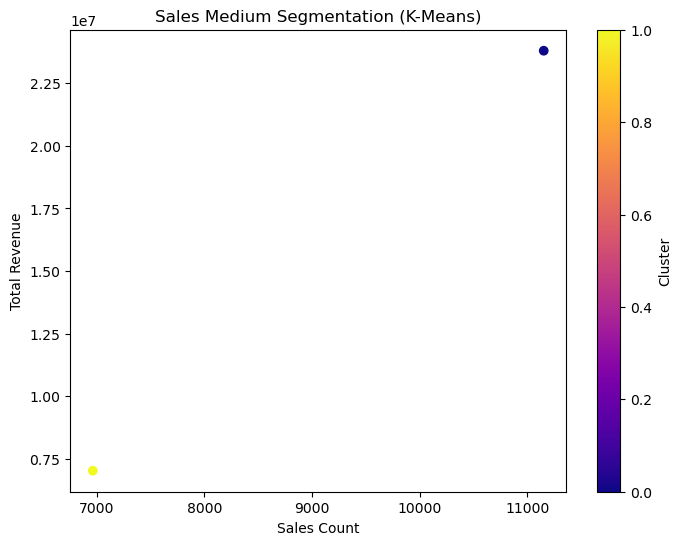

  Sales Medium  Cluster
0       Direct        0
1       Online        1


In [3]:
# Group by Sales Medium and calculate total sales count and revenue
df_medium_segmentation = df.groupby('Sales Medium').agg({
    'Sales count': 'sum',
    'Total Revenue': 'sum'
}).reset_index()

# Prepare features for clustering
X_medium = df_medium_segmentation[['Sales count', 'Total Revenue']]

# Use K-Means to cluster the sales mediums (with n_clusters=2)
kmeans_medium = KMeans(n_clusters=2, random_state=42)
df_medium_segmentation['Cluster'] = kmeans_medium.fit_predict(X_medium)

# Visualize the clusters for sales mediums
plt.figure(figsize=(8, 6))
plt.scatter(df_medium_segmentation['Sales count'], df_medium_segmentation['Total Revenue'], c=df_medium_segmentation['Cluster'], cmap='plasma')
plt.title('Sales Medium Segmentation (K-Means)')
plt.xlabel('Sales Count')
plt.ylabel('Total Revenue')
plt.colorbar(label='Cluster')
plt.show()

# Show the cluster assignments for sales mediums
print(df_medium_segmentation[['Sales Medium', 'Cluster']])

This chart is a scatter plot visualizing the results of K-Means clustering applied to sales medium data, with "Sales Count" on the x-axis and "Total Revenue" on the y-axis. The data points are colored according to their assigned cluster. 

Key Features:
* X-axis: "Sales Count" represents the number of sales for each sales medium.
* Y-axis: "Total Revenue" represents the total revenue generated by each sales medium.
* Scatter Plot: Each point on the plot represents a sales medium.
* Color Coding: The color of each point indicates its assigned cluster from the K-Means algorithm. The color bar on the right shows the cluster values corresponding to the colors.
* Data Table: A small table at the bottom shows the mapping of sales medium to cluster.

Interpretation:
* Clustering Based on Sales Count and Total Revenue: The K-Means algorithm has grouped the sales mediums into two clusters based on their "Sales Count" and "Total Revenue."
* Distinct Clusters: The plot shows two distinct clusters, indicating that the K-Means algorithm has successfully identified groups of sales mediums with different characteristics.
* Cluster 0 (Dark Purple):
    * The data table shows that "Direct" sales are assigned to Cluster 0.
    * The scatter plot shows that Cluster 0 represents a sales medium with high sales count and high total revenue.
* Cluster 1 (Yellow):
    * The data table shows that "Online" sales are assigned to Cluster 1.
    * The scatter plot shows that Cluster 1 represents a sales medium with low sales count and low total revenue.
* Insights for Business Decisions:
    * Direct Sales Performance: Direct sales contribute significantly more to both sales count and total revenue compared to online sales.
    * Online Sales Potential: The online sales medium has lower performance, indicating potential areas for improvement.
    * Resource Allocation: The company might consider allocating more resources to the direct sales channel due to its higher performance.
    * Online Strategy: The company should investigate strategies to boost online sales, such as improving the online platform, offering promotions, or enhancing online marketing efforts.

Possible Further Analysis:
* Factors Influencing Online Sales: Analyze the factors contributing to the lower performance of online sales, such as website usability, product selection, or marketing strategies.
* Customer Segmentation: Examine customer demographics and purchasing behavior across the two sales mediums to identify potential target audiences for online sales.
* Cost Analysis: Compare the costs associated with each sales medium to determine the overall profitability of each channel.
* Time Series Analysis: Analyze the sales data for each sales medium over time to identify trends and patterns.

This chart shows a clear distinction between direct and online sales based on sales count and total revenue. Direct sales are the dominant channel, while online sales represent an opportunity for improvement.

### 4. Sales Medium Segmentation Using DBSCAN

In addition to K-Means, we'll also apply DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to segment sales mediums. DBSCAN is particularly useful for detecting outliers and noise within the data, which can provide more granular insights into the sales performance.

* DBSCAN: Identifies clusters and outliers within the data, useful for detecting noise or rare sales channels.
* Normalization: Scales the data for better clustering performance.

Business Insight:
DBSCAN helps detect unusual patterns and sales channels that may be underperforming, providing opportunities for improvement.

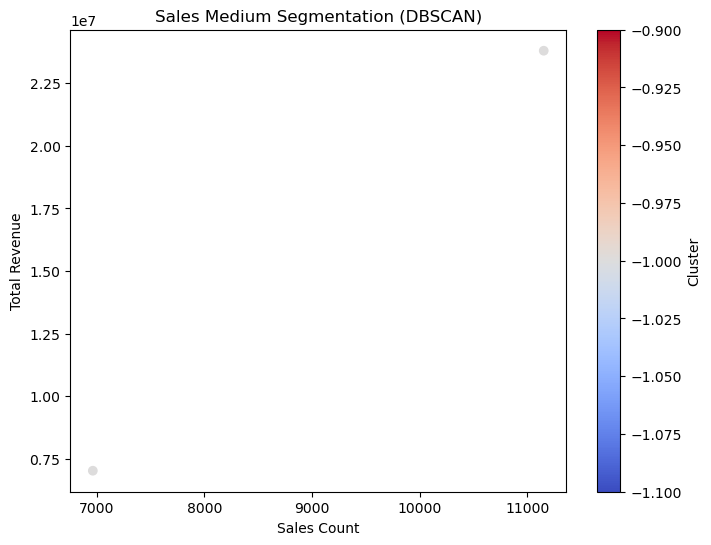

  Sales Medium  DBSCAN_Cluster
0       Direct              -1
1       Online              -1


In [4]:
from sklearn.cluster import DBSCAN
import numpy as np

# For DBSCAN, we need to normalize the data first (optional but recommended)
from sklearn.preprocessing import StandardScaler
X_medium_scaled = StandardScaler().fit_transform(X_medium)

# Apply DBSCAN for clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)  # we can adjust these parameters as needed
df_medium_segmentation['DBSCAN_Cluster'] = dbscan.fit_predict(X_medium_scaled)

# Visualize the DBSCAN results
plt.figure(figsize=(8, 6))
plt.scatter(df_medium_segmentation['Sales count'], df_medium_segmentation['Total Revenue'], c=df_medium_segmentation['DBSCAN_Cluster'], cmap='coolwarm')
plt.title('Sales Medium Segmentation (DBSCAN)')
plt.xlabel('Sales Count')
plt.ylabel('Total Revenue')
plt.colorbar(label='Cluster')
plt.show()

# Show the cluster assignments for DBSCAN
print(df_medium_segmentation[['Sales Medium', 'DBSCAN_Cluster']])

This chart is a scatter plot visualizing the results of DBSCAN clustering applied to sales medium data, with "Sales Count" on the x-axis and "Total Revenue" on the y-axis. The data points are colored according to their assigned cluster. Let's break down the interpretation:

Key Features:
* X-axis: "Sales Count" represents the number of sales for each sales medium.
* Y-axis: "Total Revenue" represents the total revenue generated by each sales medium.
* Scatter Plot: Each point on the plot represents a sales medium.
* Color Coding: The color of each point indicates its assigned cluster from the DBSCAN algorithm. The color bar on the right shows the cluster values corresponding to the colors.
* Data Table: A small table at the bottom shows the mapping of sales medium to cluster.

Interpretation:
* DBSCAN Clustering: The DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm has been used to group the sales mediums.
* Single Cluster (-1):
    * The data table shows that both "Direct" and "Online" sales mediums are assigned to cluster "-1".
    * In DBSCAN, a cluster label of "-1" typically indicates noise points or outliers.
    * The scatter plot shows that the two points are quite far apart from each other.
* No Distinct Clusters: The algorithm has not found any distinct clusters in the data. Both points are considered outliers.
* Implications:
    * The DBSCAN algorithm, due to the parameters used, views both data points as significantly different from each other.
    * This result suggests that the "Direct" and "Online" sales mediums are very different in terms of sales count and total revenue.
    * The algorithm likely didn't find a sufficient density of points to form a cluster.
    * This may be due to the small data size, or the great difference in the two data points.

Possible Further Analysis:
* Parameter Tuning: The DBSCAN algorithm's parameters (epsilon and min_samples) might need to be adjusted to find meaningful clusters.
* Other Clustering Algorithms: Consider using other clustering algorithms, such as K-Means or hierarchical clustering, to see if they can identify meaningful clusters.
* Feature Engineering: Explore other features that might help to better distinguish between the sales mediums.
* Data Investigation: Verify that the data is correct. If the data is correct, it reinforces the great difference between the two data points.
* Domain Knowledge: Consider if there are external factors that can explain this difference.
* Business Context: Consider the business context of this data. Is it expected that these two mediums are very different?

This chart shows that the DBSCAN algorithm has treated both direct and online sales as outliers, highlighting the significant difference in sales count and total revenue between the two mediums. It suggests the need for further investigation and potential parameter tuning or alternative clustering methods.

Step 5: Conclusion
By clustering the sales data based on Sales Location and Sales Medium, we are able to identify key segments within our sales data that can be targeted for strategic initiatives such as:

* Improving underperforming regions or sales channels.
* Focusing resources on high-potential locations or mediums.
* Identifying outliers or unusual trends to better predict future sales.

These insights form the foundation for sales forecasting and resource optimization, helping to align sales strategies with actual performance data.